## Paso 1: Carga del conjunto de datos

In [147]:
import pandas as pd

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv finales/comunidades_FINAL_1500.csv')

# Mostrar el contenido del dataframe
print(dataframe)


              com. autonoma  provincia descripción   precio  habitaciones   m²
0                 Andalucía    Almería      Chalet   179900             3  114
1                 Andalucía    Almería        Piso   210600             3  141
2                 Andalucía    Almería        Piso   210000             4  153
3                 Andalucía    Almería        Piso    83000             2   64
4                 Andalucía    Almería      Chalet   229000             5  150
...                     ...        ...         ...      ...           ...  ...
22035  Comunidad Valenciana   Valencia      Duplex  1575000             6   96
22036  Comunidad Valenciana   Alicante      Chalet  1949000             4  282
22037  Comunidad Valenciana  Castellón      Duplex   190000             3   98
22038  Comunidad Valenciana   Valencia      Chalet   385000             4   66
22039  Comunidad Valenciana   Valencia      Chalet   350000             3  212

[22040 rows x 6 columns]


## Paso 2: EDA

In [148]:
# Obtener las dimensiones
dataframe.shape

(22040, 6)

El dataframe tiene 22926 filas y 6 columnas.



In [149]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22040 entries, 0 to 22039
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   com. autonoma  22040 non-null  object
 1   provincia      22040 non-null  object
 2   descripción    22040 non-null  object
 3   precio         22040 non-null  int64 
 4   habitaciones   22040 non-null  int64 
 5   m²             22040 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.0+ MB


In [150]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [151]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['com. autonoma', 'provincia', 'descripción']
['precio', 'habitaciones', 'm²']


## duplicados

In [152]:
#ver duplicados

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv finales/comunidades_FINAL_1500.csv')

# Verificar duplicados
duplicados = dataframe[dataframe.duplicated()]

if duplicados.empty:
    print("No se encontraron duplicados en el DataFrame.")
else:
    print("Duplicados encontrados:")
    print(duplicados)


No se encontraron duplicados en el DataFrame.


## analisis categorico

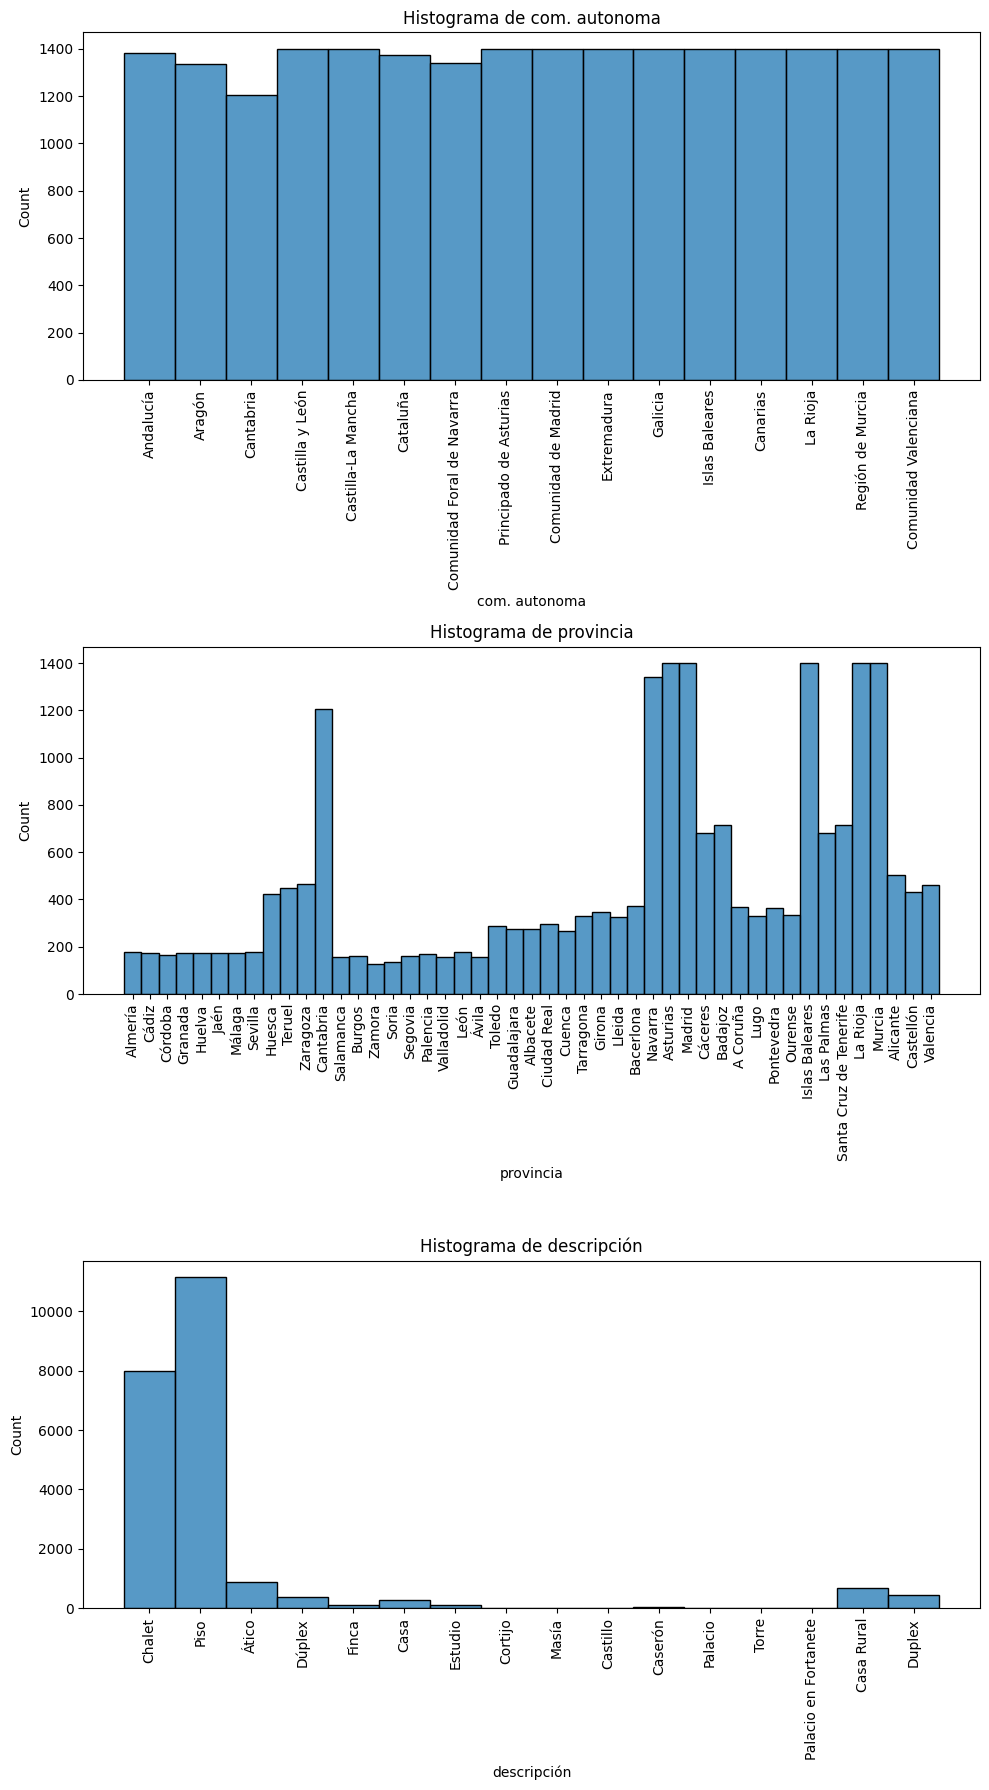

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Crear histograma para 'com. autonoma'
sns.histplot(ax=axes[0], data=dataframe, x='com. autonoma')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Histograma de com. autonoma')

# Crear histograma para 'provincia'
sns.histplot(ax=axes[1], data=dataframe, x='provincia')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Histograma de provincia')

# Crear histograma para 'descripción'
sns.histplot(ax=axes[2], data=dataframe, x='descripción')
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_title('Histograma de descripción')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## analisis numerico

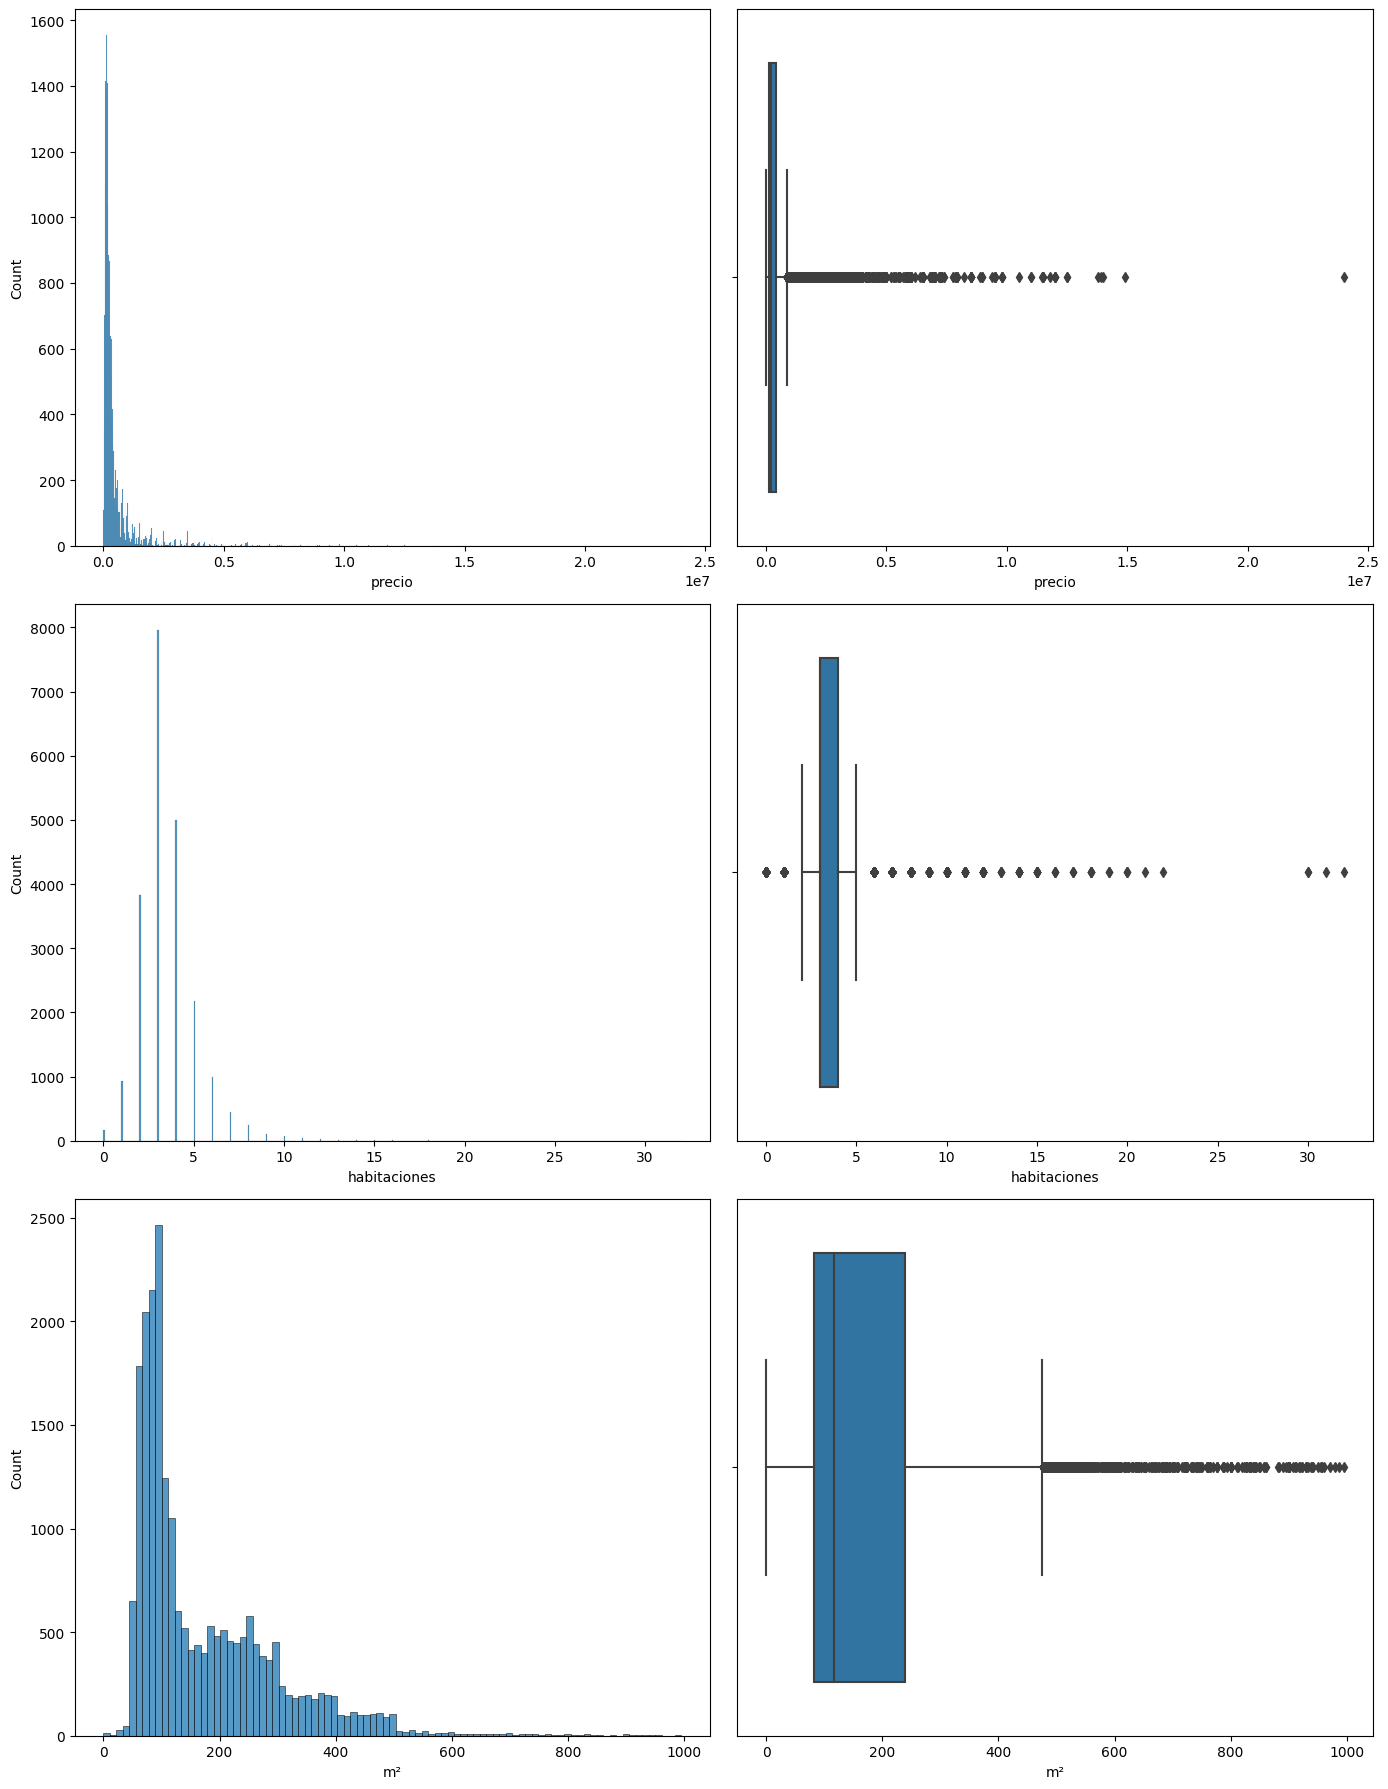

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 3 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(14, 18))

# Gráficos de las variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="precio")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="precio")
sns.histplot(ax=axis[1, 0], data=dataframe, x="habitaciones")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="habitaciones")
sns.histplot(ax=axis[2, 0], data=dataframe, x="m²")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="m²")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


## analisis categorico-categorico

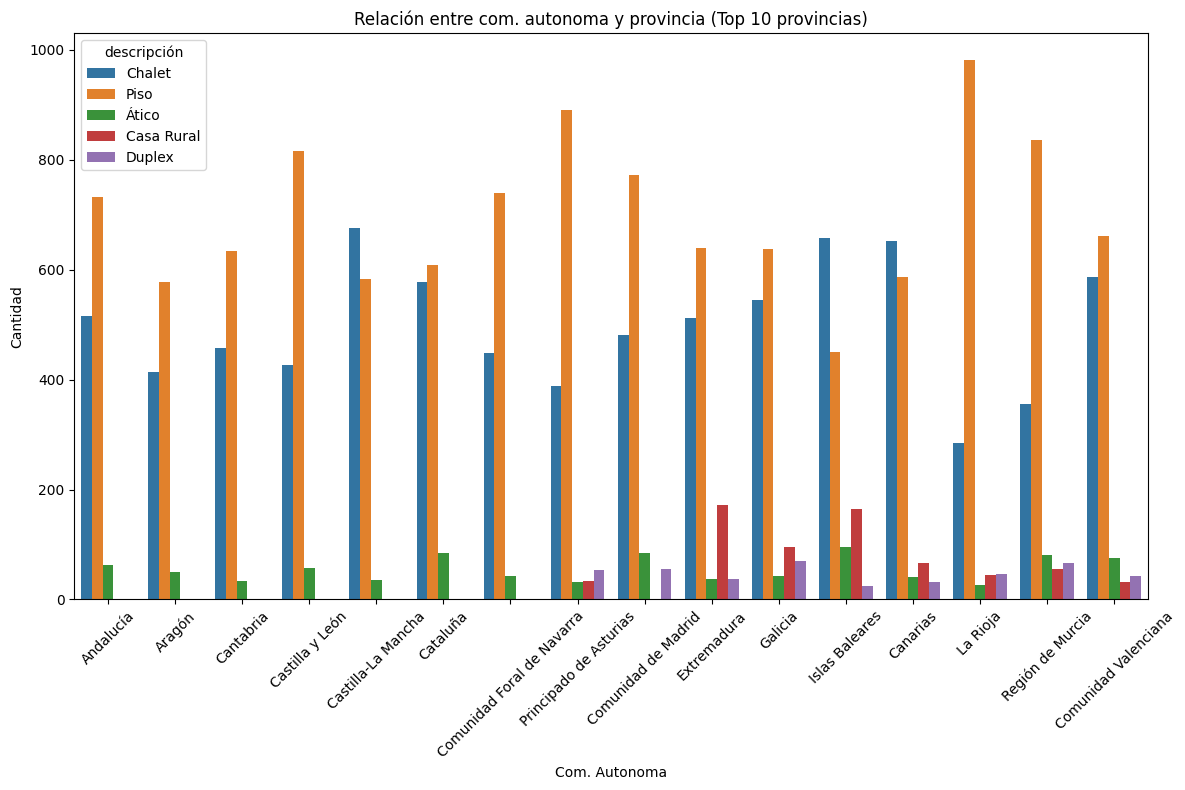

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las 10 provincias más importantes
top_10_provincias = dataframe['descripción'].value_counts().nlargest(5).index

# Filtrar el DataFrame solo para las 10 provincias más importantes
dataframe_top_10_provincias = dataframe[dataframe['descripción'].isin(top_10_provincias)]

# Crear una figura de subplots
fig, axes = plt.subplots(figsize=(12, 8))

# Crear un gráfico de barras para analizar 'com. autonoma' vs 'provincia'
sns.countplot(data=dataframe_top_10_provincias, x='com. autonoma', hue='descripción', ax=axes)
axes.set_title('Relación entre com. autonoma y provincia (Top 10 provincias)')
axes.set_xlabel('Com. Autonoma')
axes.set_ylabel('Cantidad')

# Rotar las etiquetas del eje x para mayor legibilidad
axes.tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## analisis numerico-numerico

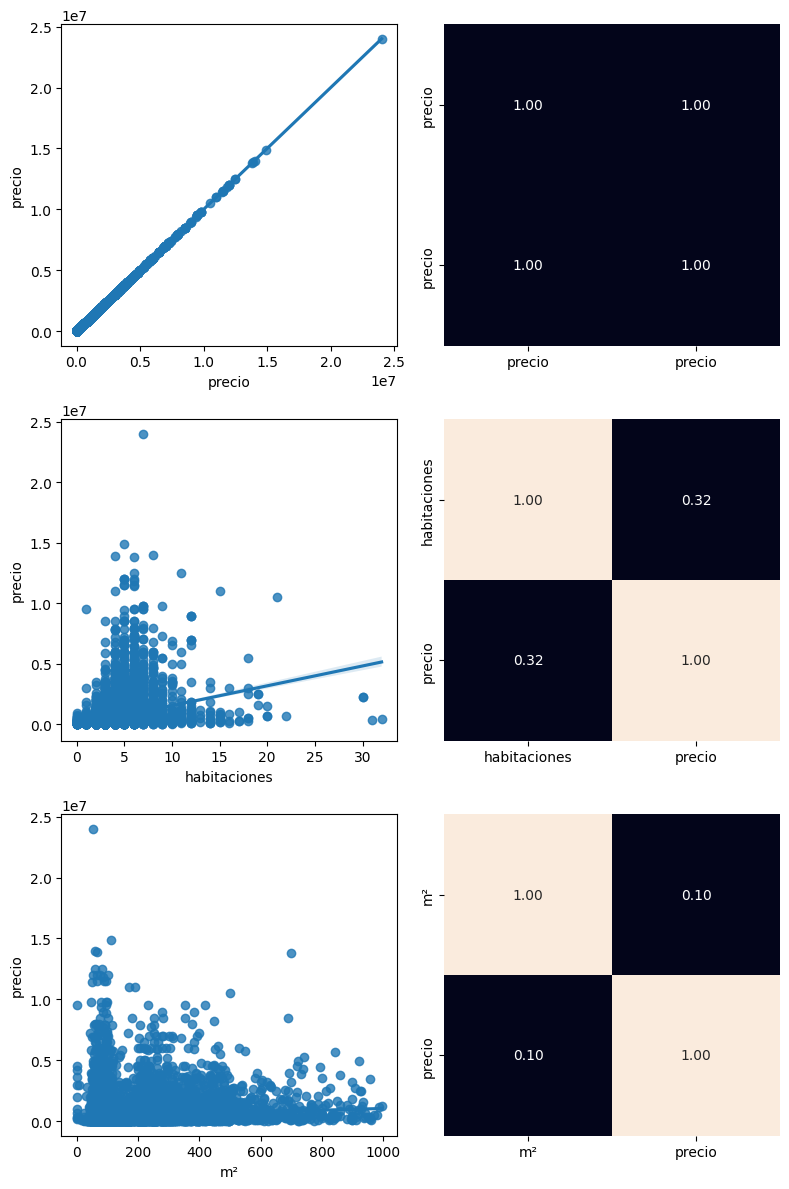

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_vivienda = ['precio', 'habitaciones', 'm²']

# Crear una figura de subplots con configuración de filas y columnas
num_rows_vivienda = len(numeric_variables_vivienda)
fig_vivienda, axis_vivienda = plt.subplots(num_rows_vivienda, 2, figsize=(8, 4*num_rows_vivienda))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables_vivienda):
    sns.regplot(ax=axis_vivienda[i, 0], data=dataframe, x=var, y="precio")
    sns.heatmap(dataframe[[var, "precio"]].corr(), annot=True, fmt=".2f", ax=axis_vivienda[i, 1], cbar=False)
    axis_vivienda[i, 0].set_ylabel("precio")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## categorico a numerico

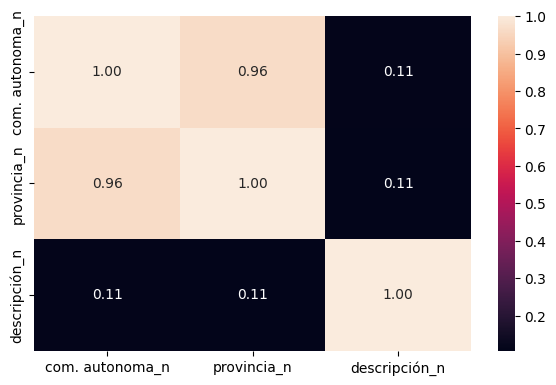

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
dataframe_copy = dataframe.copy()

fig, axis = plt.subplots(figsize=(6, 4))

# Convert categorical columns to numerical using factorize on the copied DataFrame
dataframe_copy['com. autonoma_n'] = pd.factorize(dataframe_copy['com. autonoma'])[0]
dataframe_copy['provincia_n'] = pd.factorize(dataframe_copy['provincia'])[0]
dataframe_copy['descripción_n'] = pd.factorize(dataframe_copy['descripción'])[0]

# Plot the correlation heatmap
sns.heatmap(dataframe_copy[['com. autonoma_n', 'provincia_n', 'descripción_n']].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

## analisis correlaciones

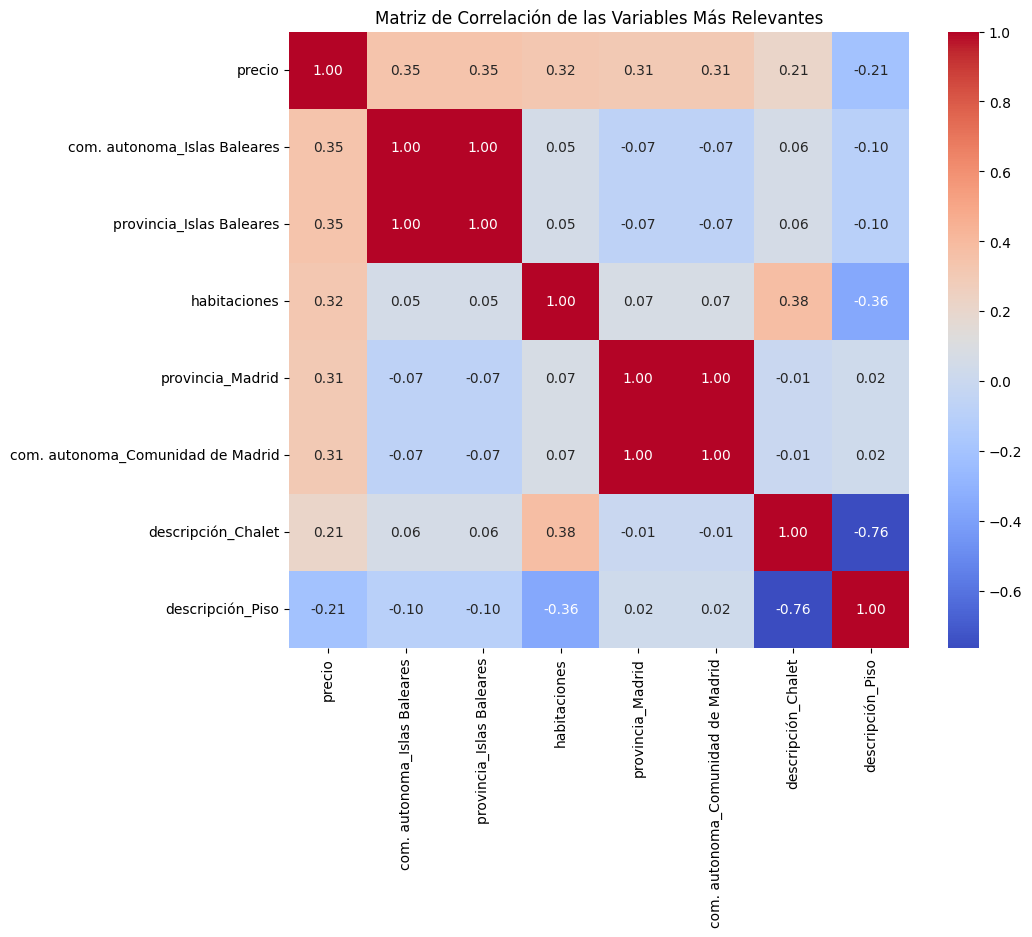

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Realizar one-hot encoding para las variables categóricas
dataframe_encoded = pd.get_dummies(dataframe, columns=['com. autonoma', 'provincia', 'descripción'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = dataframe_encoded.corr()

# Seleccionar las N variables más correlacionadas con 'precio'
N = 8  
top_correlated_features = correlation_matrix['precio'].abs().sort_values(ascending=False).head(N).index

# Filtrar la matriz de correlación para incluir solo las variables seleccionadas
correlation_matrix_filtered = correlation_matrix.loc[top_correlated_features, top_correlated_features]

# Visualizar la matriz de correlación filtrada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de las Variables Más Relevantes")
plt.show()


## analizamos las mejores variables

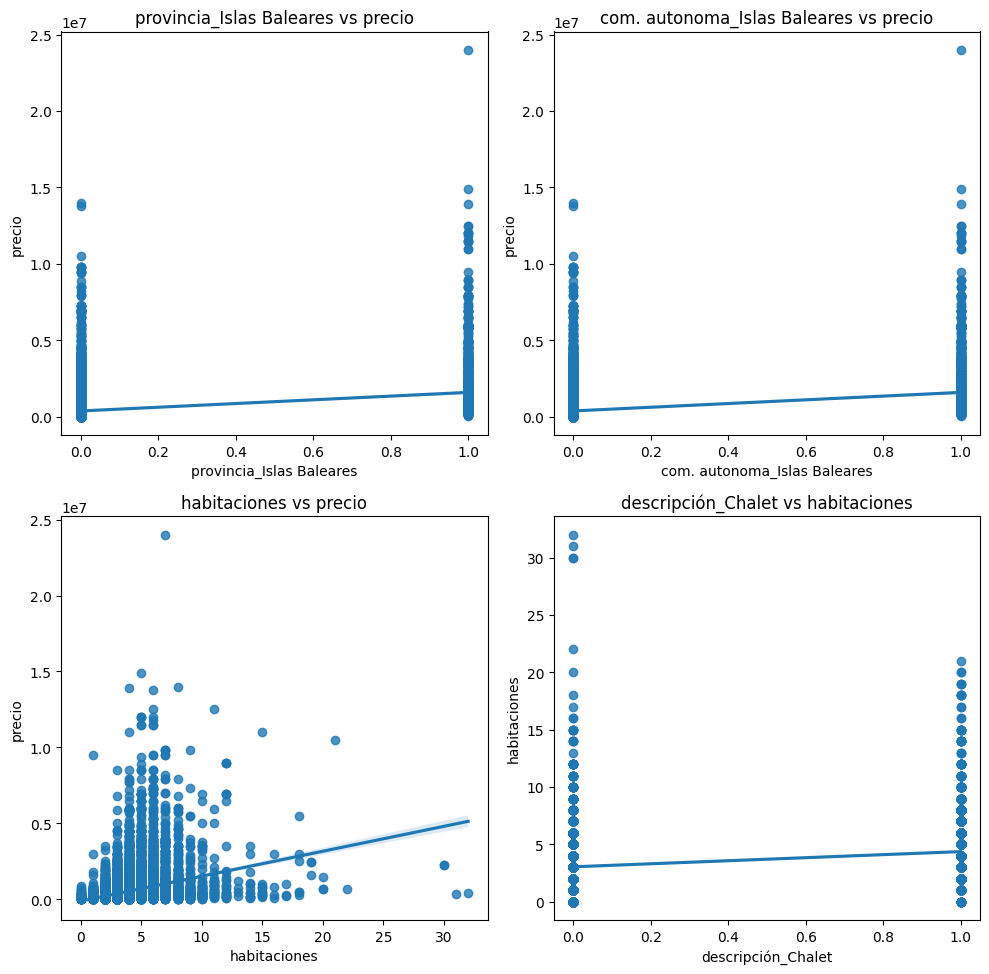

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame con las variables seleccionadas
variables_seleccionadas = dataframe_encoded[['precio', 'provincia_Islas Baleares', 'com. autonoma_Islas Baleares', 'habitaciones', 'descripción_Chalet']]

# Crear una figura de subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

# Realizar gráficos de dispersión para las variables seleccionadas
sns.regplot(ax=axes[0, 0], data=variables_seleccionadas, x='provincia_Islas Baleares', y='precio')
axes[0, 0].set_title('provincia_Islas Baleares vs precio')

sns.regplot(ax=axes[0, 1], data=variables_seleccionadas, x='com. autonoma_Islas Baleares', y='precio')
axes[0, 1].set_title('com. autonoma_Islas Baleares vs precio')

sns.regplot(ax=axes[1, 0], data=variables_seleccionadas, x='habitaciones', y='precio')
axes[1, 0].set_title('habitaciones vs precio')

sns.regplot(ax=axes[1, 1], data=variables_seleccionadas, x='descripción_Chalet', y='habitaciones')
axes[1, 1].set_title('descripción_Chalet vs habitaciones')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## dibujamos pairplot

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


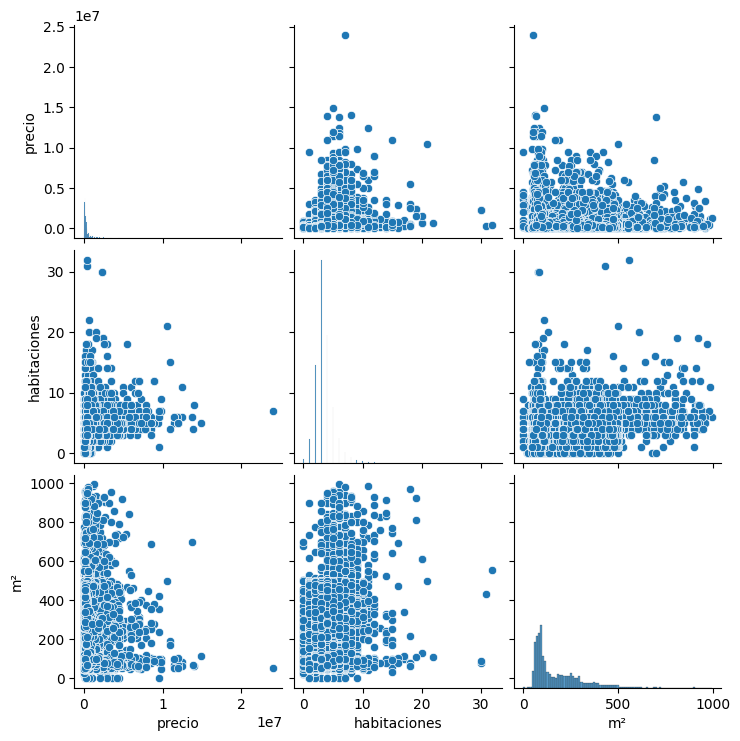

In [160]:

sns.pairplot(dataframe)

## análisis descriptivo

In [161]:
# Establecer el formato de punto flotante
pd.options.display.float_format = '{:.2f}'.format

# Realizar el análisis descriptivo
dataframe.describe()



,precio,habitaciones,m²
count,22040.00,22040.00,22040.00
mean,460055.60,3.52,173.00
std,855436.37,1.68,125.14
min,25.00,0.00,0.00
25%,129900.00,3.00,83.00
50%,220000.00,3.00,117.00
75%,419000.00,4.00,240.00
max,24000000.00,32.00,995.00


## outliers

In [162]:
print(variables_seleccionadas.dtypes)


precio                          int64
provincia_Islas Baleares         bool
com. autonoma_Islas Baleares     bool
habitaciones                    int64
descripción_Chalet               bool
dtype: object


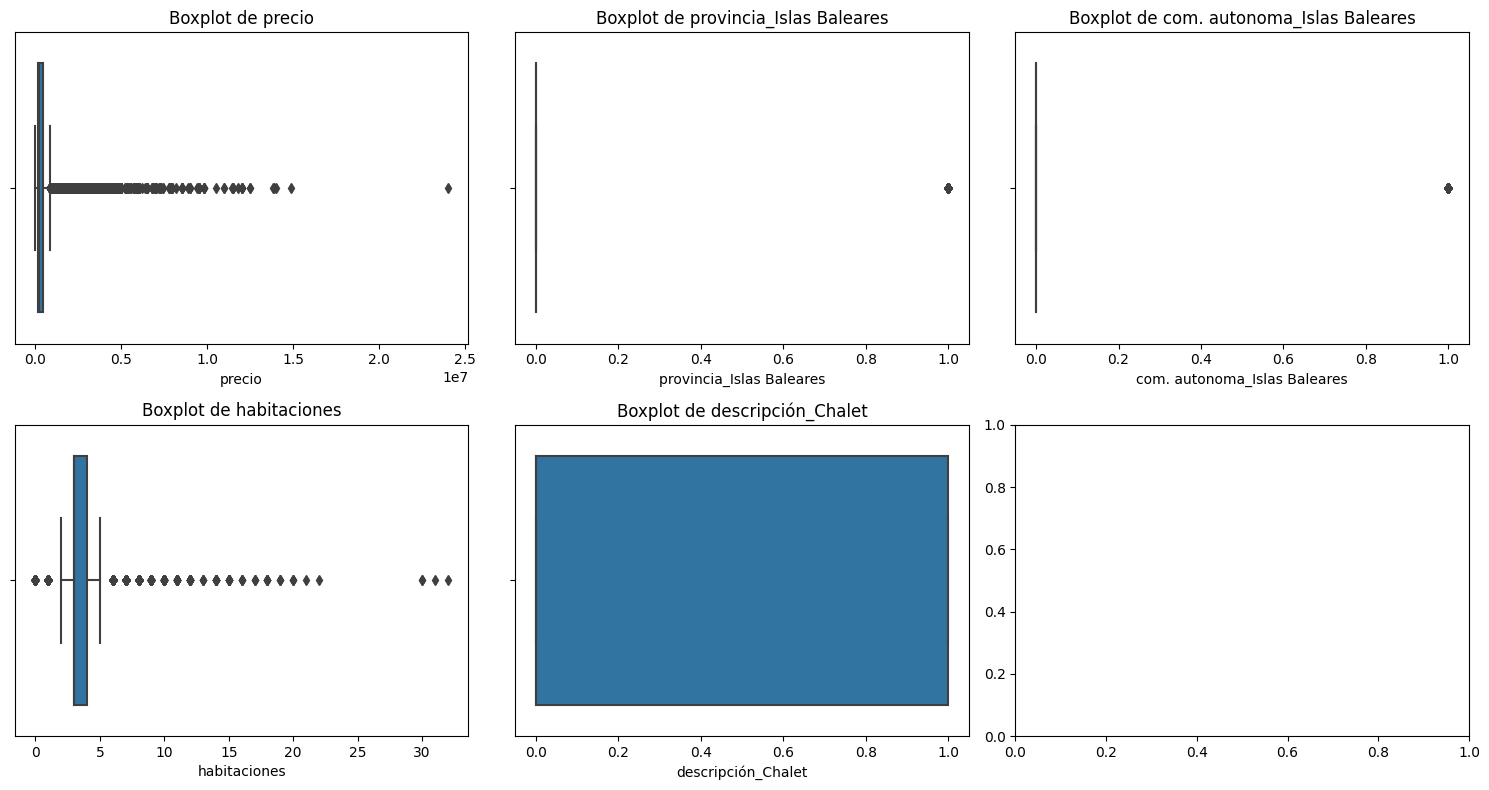

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir columnas booleanas en numéricas usando .loc
variables_seleccionadas.loc[:, 'provincia_Islas Baleares'] = variables_seleccionadas['provincia_Islas Baleares'].astype(int)
variables_seleccionadas.loc[:, 'com. autonoma_Islas Baleares'] = variables_seleccionadas['com. autonoma_Islas Baleares'].astype(int)
variables_seleccionadas.loc[:, 'descripción_Chalet'] = variables_seleccionadas['descripción_Chalet'].astype(int)

# Crear una figura de subplots con 2 filas y 3 columnas (excluimos 'precio')
fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=3)

# Realizar boxplots para detectar outliers
for i, variable in enumerate(variables_seleccionadas.columns):  # Incluimos todas las columnas
    sns.boxplot(ax=axes[i//3, i%3], data=variables_seleccionadas, x=variable)
    axes[i//3, i%3].set_title(f'Boxplot de {variable}')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## analizamos outliers de cada variables

In [164]:
# Variables numéricas seleccionadas
numeric_variables = ['precio', 'habitaciones', 'm²']

# Iterar sobre las variables numéricas
for variable in numeric_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")

    # Filtrar y eliminar outliers
    outliers = dataframe[(dataframe[variable] > upper_limit) | (dataframe[variable] < lower_limit)]
    dataframe = dataframe.drop(outliers.index)

# Mostrar el número de filas después de eliminar outliers
print(f"Número de filas después de eliminar outliers: {len(dataframe)}")


count      22040.00
mean      460055.60
std       855436.37
min           25.00
25%       129900.00
50%       220000.00
75%       419000.00
max     24000000.00
Name: precio, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en precio son 852650.0 y -303750.0, con un rango intercuartílico de 289100.0

count   19553.00
mean        3.34
std         1.52
min         0.00
25%         3.00
50%         3.00
75%         4.00
max        32.00
Name: habitaciones, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en habitaciones son 5.5 y 1.5, con un rango intercuartílico de 1.0

count   17226.00
mean      160.93
std       106.27
min         0.00
25%        84.00
50%       115.00
75%       221.00
max       960.00
Name: m², dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en m² son 426.5 y -121.5, con un rango intercuartílico de 137.0

Número de filas después de eliminar outliers: 16730


## Análisis de valores faltantes

In [165]:

dataframe.isnull().sum()

com. autonoma    0
provincia        0
descripción      0
precio           0
habitaciones     0
m²               0
dtype: int64

In [166]:
'''# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
print(dataframe.columns)

# Obtener y mostrar los tipos de dato de cada columna
column_types = dataframe.dtypes
print("\nTipos de dato de cada columna:")
print(column_types)
'''

'# Imprimir los nombres de las columnas\nprint("Nombres de las columnas:")\nprint(dataframe.columns)\n\n# Obtener y mostrar los tipos de dato de cada columna\ncolumn_types = dataframe.dtypes\nprint("\nTipos de dato de cada columna:")\nprint(column_types)\n'

## Escalado Mínimo-Máximo

In [167]:

from sklearn.preprocessing import MinMaxScaler

# Variables numéricas seleccionadas
numeric_variables = ['precio', 'habitaciones', 'm²']

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado mínimo-máximo a las variables numéricas
dataframe[numeric_variables] = scaler.fit_transform(dataframe[numeric_variables])

# Mostrar el DataFrame con las variables escaladas
print(dataframe.head())


  com. autonoma provincia descripción  precio  habitaciones   m²
0     Andalucía   Almería      Chalet    0.21          0.33 0.27
1     Andalucía   Almería        Piso    0.25          0.33 0.33
2     Andalucía   Almería        Piso    0.25          0.67 0.36
3     Andalucía   Almería        Piso    0.10          0.00 0.15
4     Andalucía   Almería      Chalet    0.27          1.00 0.35


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Variables numéricas seleccionadas
numeric_variables = ['precio', 'habitaciones', 'm²']

# Dividir el DataFrame en características (X) y variable objetivo (y)
X = dataframe[numeric_variables]
y = dataframe['precio']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SelectKBest para seleccionar las mejores características
k_best_selector = SelectKBest(score_func=f_regression, k=3)  # Seleccionar las 3 mejores características
X_train_selected = k_best_selector.fit_transform(X_train, y_train)
X_test_selected = k_best_selector.transform(X_test)

# Obtener los índices de las características seleccionadas
selected_indices = k_best_selector.get_support(indices=True)

# Mostrar las columnas seleccionadas
selected_columns = [X.columns[i] for i in selected_indices]
print("Características seleccionadas:", selected_columns)

# Mostrar las primeras filas de los conjuntos de entrenamiento y prueba con las características seleccionadas
print("\nConjunto de TRAIN con características seleccionadas:")
df_train_selected = pd.DataFrame(X_train_selected, columns=selected_columns)
print(df_train_selected.head())

print("\nConjunto de TEST con características seleccionadas:")
df_test_selected = pd.DataFrame(X_test_selected, columns=selected_columns)
print(df_test_selected.head())

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
df_train_selected.to_csv('train_selected.csv', index=False)
df_test_selected.to_csv('test_selected.csv', index=False)
print("\nConjunto de TRAIN y TEST exportados")



Características seleccionadas: ['precio', 'habitaciones', 'm²']

Conjunto de TRAIN con características seleccionadas:
   precio  habitaciones   m²
0    0.42          0.67 0.20
1    0.19          0.33 0.43
2    0.29          0.67 0.51
3    0.27          0.00 0.18
4    0.31          0.33 0.28

Conjunto de TEST con características seleccionadas:
   precio  habitaciones   m²
0    0.21          0.33 0.27
1    0.80          0.00 0.61
2    0.22          0.33 0.21
3    0.47          0.33 0.12
4    0.16          0.33 0.18

Conjunto de TRAIN y TEST exportados
